<a href="https://colab.research.google.com/github/Mohamedthoufiq31/SUMMETERNRIN/blob/main/DAY_5_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1: Create a file that contains 1000 lines of random strings
r


In [1]:
generate_random_string <- function(length = 10) {
  paste(sample(c(LETTERS, letters, 0:9), length, replace = TRUE), collapse = "")
}

file_conn <- file("random_strings.txt")
writeLines(sapply(1:1000, function(x) generate_random_string()), file_conn)
close(file_conn)


Q2: Create a random dataset of 100 rows and 30 columns with values between [1,200] and perform operations

In [2]:
install.packages("corrplot")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded



[1] "Rows with missing values: 100"


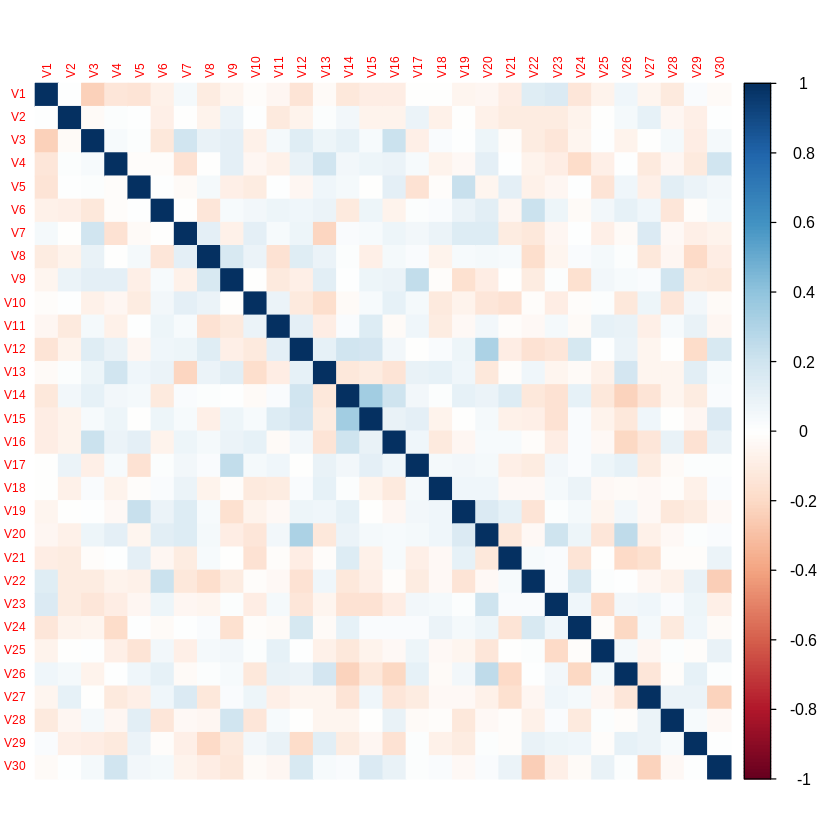

In [3]:
# Install required packages if not already installed
required_packages <- c("dplyr", "tidyr", "ggplot2", "corrplot", "scales")
new_packages <- required_packages[!(required_packages %in% installed.packages()[, "Package"])]

if(length(new_packages)) install.packages(new_packages)

# Load libraries
library(dplyr)
library(tidyr)
library(ggplot2)
library(corrplot)
library(scales)

# Create a random dataset
set.seed(123)
df <- as.data.frame(matrix(sample(1:200, 100 * 30, replace = TRUE), nrow = 100, ncol = 30))

# (i) Replace values between [10, 60] with NA and count rows with missing values
df[df >= 10 & df <= 60] <- NA
rows_with_missing_values <- sum(rowSums(is.na(df)) > 0)
print(paste("Rows with missing values:", rows_with_missing_values))

# (ii) Replace NA values with the average of the column
df <- df %>% mutate_all(~ifelse(is.na(.), mean(., na.rm = TRUE), .))

# (iii) Find Pearson correlation and plot heatmap
correlation_matrix <- cor(df)
corrplot(correlation_matrix, method = "color", tl.cex = 0.6)


Q3: Create a random dataset of 500 rows and 10 columns and apply clustering algorithms

In [4]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘DT’, ‘rstatix’, ‘FactoMineR’, ‘ggpubr’


Warning message in install.packages("factoextra"):
“installation of package ‘httpuv’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘DT’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘FactoMineR’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘factoextra’ had non-zero exit status”


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘DT’, ‘FactoMineR’


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



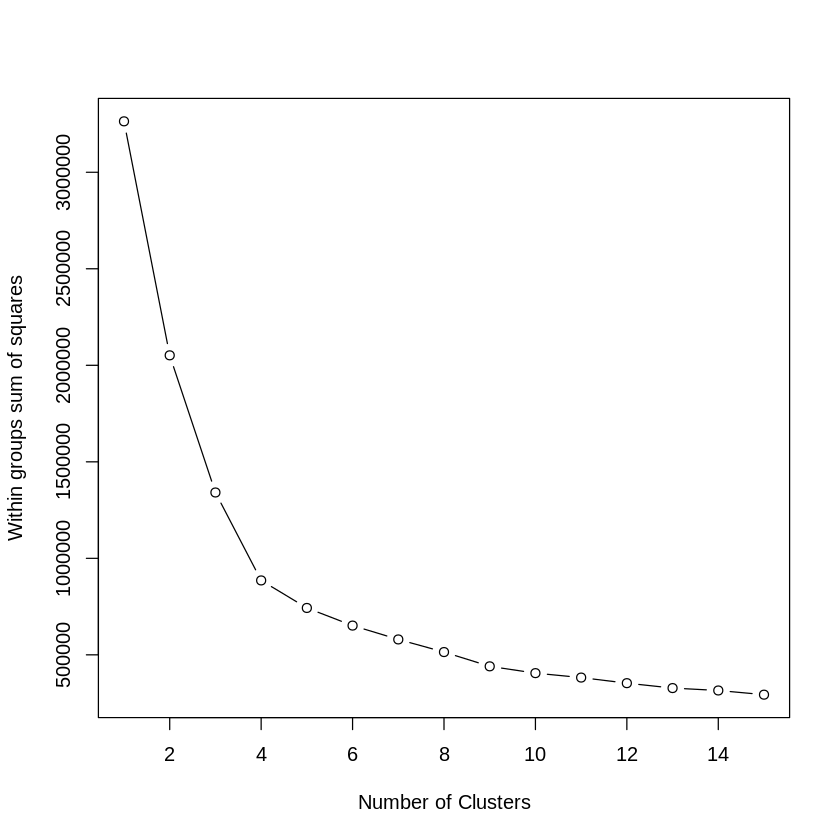

In [14]:
# Install required packages if not already installed
required_packages <- c("cluster", "factoextra")
new_packages <- required_packages[!(required_packages %in% installed.packages()[, "Package"])]

if(length(new_packages)) install.packages(new_packages)

# Load necessary libraries
library(cluster)
library(factoextra)

# Set seed for reproducibility
set.seed(123)

# Create random dataset
df <- data.frame(
  matrix(runif(500 * 4, -10, 10), ncol = 4),
  matrix(runif(500 * 4, 10, 20), ncol = 4),
  matrix(runif(500 * 2, -100, 100), ncol = 2)
)

# (i) K-Means clustering
wss <- (nrow(df)-1) * sum(apply(df, 2, var))
for (i in 2:15) wss[i] <- sum(kmeans(df, centers = i)$withinss)
plot(1:15, wss, type = "b", xlab = "Number of Clusters", ylab = "Within groups sum of squares")

# (ii) Hierarchical cl


Q4: Create a random dataset of 600 rows and 15 columns and perform visualizations

In [7]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


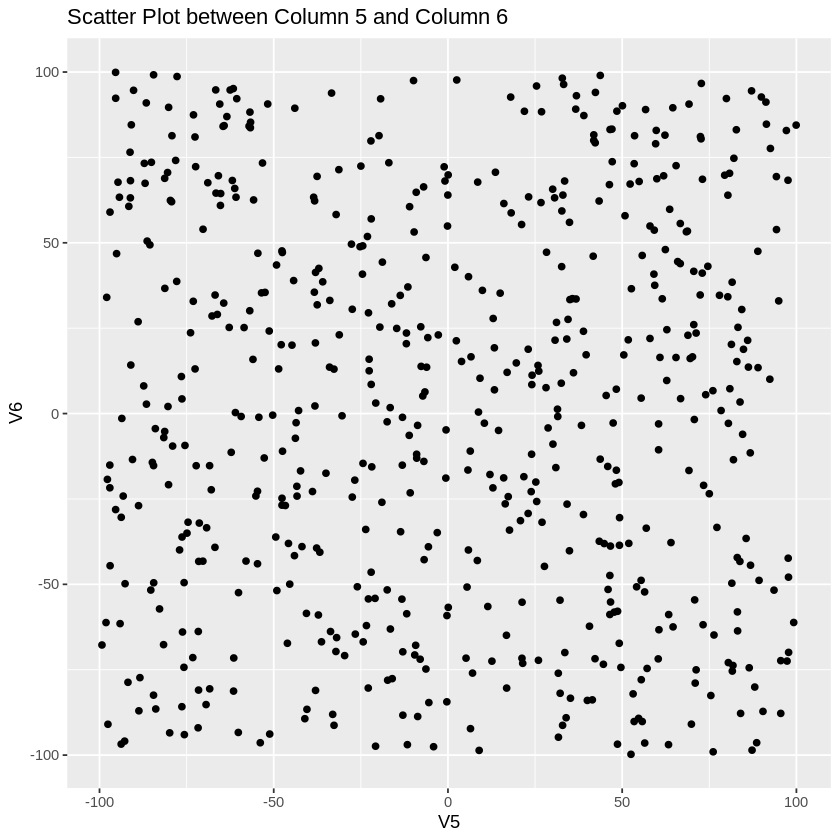

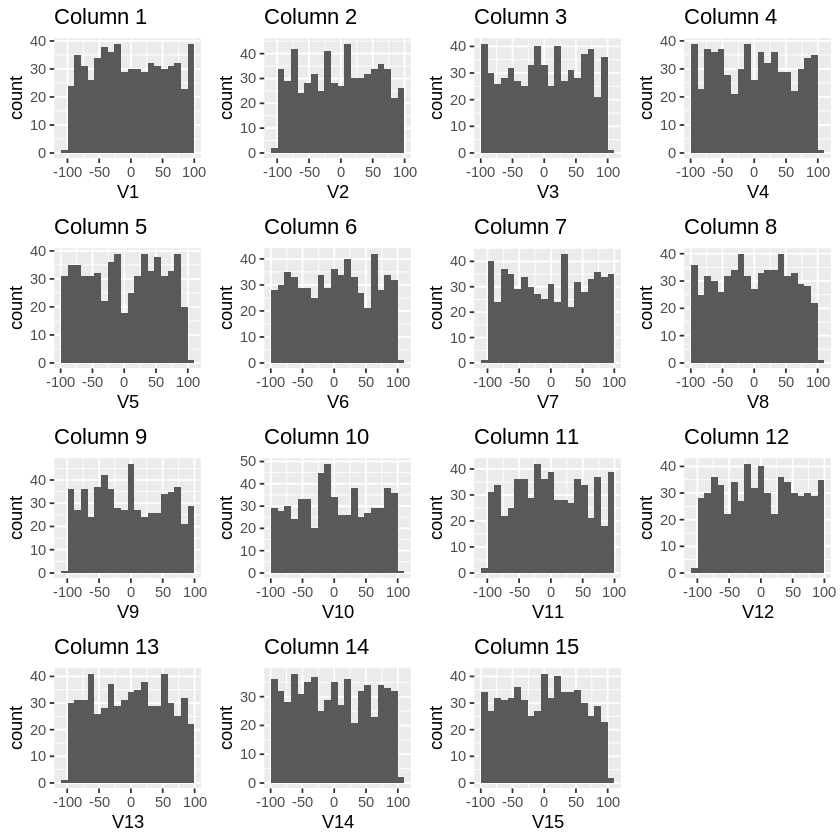

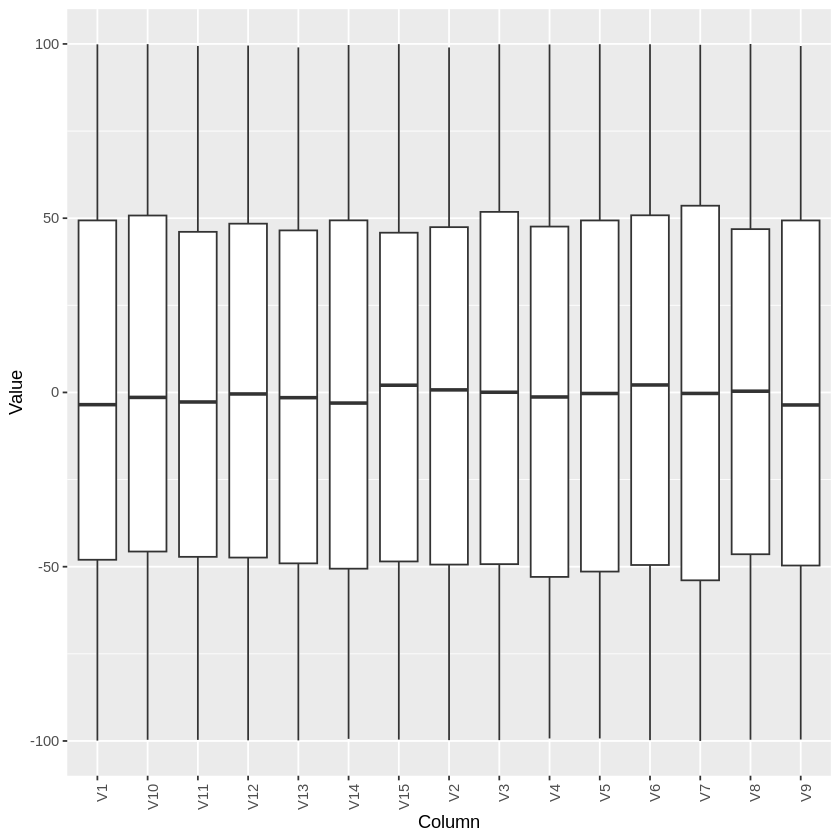

In [9]:
library(ggplot2)
library(gridExtra)

# Create random dataset
set.seed(123)
df <- as.data.frame(matrix(runif(600 * 15, -100, 100), nrow = 600, ncol = 15))

# (i) Plot scatter graph between Column 5 and Column 6
ggplot(df, aes(x = V5, y = V6)) + geom_point() + labs(title = "Scatter Plot between Column 5 and Column 6")

# (ii) Plot histogram of each column in single graph
hist_list <- lapply(1:ncol(df), function(i) {
  ggplot(df, aes_string(x = names(df)[i])) + geom_histogram(bins = 20) + ggtitle(paste("Column", i))
})
do.call(grid.arrange, c(hist_list, ncol = 4))

# (iii) Plot Box plot of each column in single graph
df_long <- gather(df, key = "Column", value = "Value")
ggplot(df_long, aes(x = Column, y = Value)) + geom_boxplot() + theme(axis.text.x = element_text(angle = 90, hjust = 1))


Q5: Create a random dataset of 500 rows and 5 columns and perform statistical tests


In [10]:
install.packages("stats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”


In [11]:
install.packages("coin")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘TH.data’, ‘sandwich’, ‘libcoin’, ‘matrixStats’, ‘modeltools’, ‘multcomp’




In [12]:
library(stats)
library(coin)

# Create random dataset
set.seed(123)
df <- as.data.frame(matrix(runif(500 * 5, 5, 10), nrow = 500, ncol = 5))

# (i) Perform t-Test on each column
for (i in 1:ncol(df)) {
  t_test <- t.test(df[[i]], mu = 7.5)
  print(paste("t-Test for column", i, ": t-stat =", t_test$statistic, ", p-value =", t_test$p.value))
}

# (ii) Perform Wilcoxon Signed Rank Test on each column
for (i in 1:ncol(df)) {
  wilcox_test <- wilcox.test(df[[i]], mu = 7.5)
  print(paste("Wilcoxon Signed Rank Test for column", i, ": W =", wilcox_test$statistic, ", p-value =", wilcox_test$p.value))
}

# (iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4
t_test <- t.test(df[[3]], df[[4]])
print(paste("Two Sample t-Test between Column 3 and Column 4: t-stat =", t_test$statistic, ", p-value =", t_test$p.value))

wilcox_test <- wilcox.test(df[[3]], df[[4]])
print(paste("Wilcoxon Rank Sum Test between Column 3 and Column 4: W =", wilcox_test$statistic, ", p-value =", wilcox_test$p.value))


Loading required package: survival


Attaching package: ‘coin’


The following object is masked from ‘package:scales’:

    pvalue




[1] "t-Test for column 1 : t-stat = -0.370786939918987 , p-value = 0.71095358179746"
[1] "t-Test for column 2 : t-stat = -0.0559879996736086 , p-value = 0.955373777135829"
[1] "t-Test for column 3 : t-stat = -0.482097027931255 , p-value = 0.629948404163448"
[1] "t-Test for column 4 : t-stat = 0.203185093051755 , p-value = 0.839073189238854"
[1] "t-Test for column 5 : t-stat = -0.693062687670941 , p-value = 0.488592648990075"
[1] "Wilcoxon Signed Rank Test for column 1 : W = 61391 , p-value = 0.702747977364458"
[1] "Wilcoxon Signed Rank Test for column 2 : W = 62390 , p-value = 0.942165525811833"
[1] "Wilcoxon Signed Rank Test for column 3 : W = 61174 , p-value = 0.653613510756342"
[1] "Wilcoxon Signed Rank Test for column 4 : W = 63335 , p-value = 0.826259559388136"
[1] "Wilcoxon Signed Rank Test for column 5 : W = 60323 , p-value = 0.476448834494718"
[1] "Two Sample t-Test between Column 3 and Column 4: t-stat = -0.482794068990735 , p-value = 0.629347878688625"
[1] "Wilcoxon Rank Sum 